# <center>        **Introduction to Data Science (S1-22_DSECLZG532)-ASSIGNMENT**</center>

## Group No - 01

## Group Member Names:
1.BASKAR A -(2022da04147@wilp.bits-pilani.ac.in)

2.KESIGAN A - (2022da04099@wilp.bits-pilani.ac.in)

3.RAGHURAM GOWDA - (2022da04070@wilp.bits-pilani.ac.in)

4.SHARATH KUMAR K A - (2022da04002@wilp.bits-pilani.ac.in)

# 1. Business Understanding
 
Students are expected to identify a data analytics task of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

What is the business problem that you are trying to solve?
Ans:  We are trying to predict the Tsunami event using classification usecase

What data do you need to answer the above problem?
Ans: We are using online data - https://earthquake.usgs.gov/fdsnws/event/1/query

What are the different sources of data?
Ans: Only one source - https://earthquake.usgs.gov/fdsnws/event/1/query

What kind of analytics task are you performing?
Ans: we are using
     a) Descriptive (business intelligence and data mining) 
     b) Predictive (forecasting)

# 2. Data Acquisition
 
For the problem identified , find an appropriate data set (Your data set must 
be unique) from any public data source.

---



## 2.1 Download the data directly



In [312]:
import numpy as np
import pandas as pd
import requests, json
source1 = r"https://earthquake.usgs.gov/fdsnws/event/1/query?"
par1 = {"format": "geojson", "starttime": "2000-01-01", "endtime": "2021-12-31", "alertlevel":"red"}
data1 = requests.get(source1, params = par1)
source2 = r"https://earthquake.usgs.gov/fdsnws/event/1/query?"
dataset1 = json.loads(data1.text)
par2 = {"format": "geojson", "starttime": "2000-01-01", "endtime": "2021-12-31", "alertlevel":"green"}
data2 = requests.get(source2, params = par2)
dataset2 = json.loads(data2.text)
source3 = r"https://earthquake.usgs.gov/fdsnws/event/1/query?"
par3 = {"format": "geojson", "starttime": "2000-01-01", "endtime": "2021-12-31", "alertlevel":"yellow"}
data3 = requests.get(source3, params = par3)
dataset3 = json.loads(data3.text)  #Data is downloaded 

## 2.2 Code for converting the above downloaded data into a dataframe

In [352]:
def dict2df(dict):
    dataset = dict
    
    df = pd.DataFrame(dataset['features'])
    #print(features)
    df = pd.json_normalize(dataset['features'])
    df = df.reindex(columns=['id', 'properties.time', 'properties.place', 'properties.mag', 'properties.cdi', 'properties.mmi', 'properties.dmin', 'properties.rms', 'properties.gap','properties.alert','properties.tsunami'])
    df.rename(columns={'id':'ID', 'properties.time':'Time', 'properties.place':'Place', 'properties.mag':'Magnitude', 'properties.cdi':'CDI', 'properties.mmi': 'MMI', 'properties.dmin': 'DMIN', 'properties.rms': "RMS", 'properties.gap': "GAP" ,'properties.tsunami':'Tsunami', 'properties.alert':'Alert'}, inplace=True)
    df1 = df['Place'].str.split(',', n = 1, expand = True)
    df['City'] = df1[0]
    df['Country'] = df1[1]
    df.drop(columns = ['Place'], inplace = True)
    df = df.reindex(columns= ['ID', 'Time', 'City', 'Country', 'Magnitude', 'CDI', 'MMI', 'DMIN', 'RMS', 'GAP', 'Alert', 'Tsunami'])
    return df

df1 = dict2df(dataset1)
df2 = dict2df(dataset2)
df3 = dict2df(dataset3)
df = pd.concat([df1, df2])
df = pd.concat([df, df3])
print(df['Alert'].unique())

['red' 'green' 'yellow']


## 2.3 Confirm the data has been downloaded correctly by displaying the first 5 and last 5 records.

In [353]:
#translate alert feature into numeric
df['alert_nf'] = np.where(df.Alert == 'red', 2, (np.where(df.Alert=='yellow', 1, 0)))
df['alert_nf'].unique()
dff=df.drop('Alert', axis='columns')
dff.columns

Index(['ID', 'Time', 'City', 'Country', 'Magnitude', 'CDI', 'MMI', 'DMIN',
       'RMS', 'GAP', 'Tsunami', 'alert_nf'],
      dtype='object')

In [354]:
dff.head(5)

ID           Time                       City  Country  Magnitude  \
0  us7000fu12  1636891718812  63 km NNW of Bandar Abbas     Iran        6.4   
1  us7000fbky  1631738011851       52 km SE of Neijiang    China        5.4   
2  us7000f93v  1631065667437                   Acapulco   Mexico        7.0   
3  us6000f65h  1628944148454                     Nippes    Haiti        7.2   
4  us7000dy3b  1619576486212     8 km NNW of Dhekiajuli    India        6.0   

   CDI    MMI   DMIN   RMS   GAP  Tsunami  alert_nf  
0  8.6  8.689  2.772  0.90  52.0        0         2  
1  7.3  7.413  3.749  0.67  19.0        0         2  
2  7.7  7.735  0.070  0.64  43.0        1         2  
3  9.1  8.425  1.178  0.75  23.0        1         2  
4  8.5  7.049  1.324  0.79  11.0        0         2

In [355]:
dff.tail(5)

ID           Time                           City      Country  \
168  ci14607836  1270422914240                9km SW of Delta     B.C., MX   
169  ci31957759  1270421417120  12km SSW of Estacion Coahuila     B.C., MX   
170  ci14565620  1262198937330                12km N of Delta     B.C., MX   
171  nc30228270  1096391724250         10 km SSE of Parkfield   California   
172  ci12456384  1014406361750              13km WSW of Delta     B.C., MX   

     Magnitude  CDI    MMI     DMIN   RMS    GAP  Tsunami  alert_nf  
168       5.43  NaN  7.140  0.49550  0.23  254.0        0         1  
169       5.70  NaN  7.146  0.78110  0.33  296.0        0         1  
170       5.80  7.1  8.045  0.32400  0.39  205.0        0         1  
171       5.97  6.3  7.931  0.01622  0.04   26.0        0         1  
172       5.70  5.3  6.943  0.47510  0.38  217.5        0         1

## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [356]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7157 entries, 0 to 172
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         7157 non-null   object 
 1   Time       7157 non-null   int64  
 2   City       7135 non-null   object 
 3   Country    5765 non-null   object 
 4   Magnitude  7155 non-null   float64
 5   CDI        4435 non-null   float64
 6   MMI        7157 non-null   float64
 7   DMIN       5791 non-null   float64
 8   RMS        7135 non-null   float64
 9   GAP        6350 non-null   float64
 10  Tsunami    7157 non-null   int64  
 11  alert_nf   7157 non-null   int32  
dtypes: float64(6), int32(1), int64(2), object(3)
memory usage: 698.9+ KB


In [357]:
dff.info

<bound method DataFrame.info of              ID           Time                           City      Country  \
0    us7000fu12  1636891718812      63 km NNW of Bandar Abbas         Iran   
1    us7000fbky  1631738011851           52 km SE of Neijiang        China   
2    us7000f93v  1631065667437                       Acapulco       Mexico   
3    us6000f65h  1628944148454                         Nippes        Haiti   
4    us7000dy3b  1619576486212         8 km NNW of Dhekiajuli        India   
..          ...            ...                            ...          ...   
168  ci14607836  1270422914240                9km SW of Delta     B.C., MX   
169  ci31957759  1270421417120  12km SSW of Estacion Coahuila     B.C., MX   
170  ci14565620  1262198937330                12km N of Delta     B.C., MX   
171  nc30228270  1096391724250         10 km SSE of Parkfield   California   
172  ci12456384  1014406361750              13km WSW of Delta     B.C., MX   

     Magnitude  CDI    MMI     

In [358]:
dff.describe()

Time    Magnitude          CDI          MMI         DMIN  \
count  7.157000e+03  7155.000000  4435.000000  7157.000000  5791.000000   
mean   1.501956e+12     5.319514     4.045795     3.837783     3.545250   
std    9.966673e+10     0.818037     1.851657     1.935112     5.061230   
min    9.492594e+11     0.100000     0.000000     0.000000     0.001033   
25%    1.430814e+12     4.730000     3.000000     3.150000     0.641500   
50%    1.517483e+12     5.500000     4.100000     4.000000     1.848000   
75%    1.581856e+12     5.800000     5.200000     5.032000     4.339500   
max    1.640870e+12     8.600000     9.100000     8.730000    39.934000   

               RMS          GAP      Tsunami     alert_nf  
count  7135.000000  6350.000000  7157.000000  7157.000000  
mean      0.782460    55.998047     0.133995     0.030320  
std       0.324656    50.851852     0.340670     0.188556  
min       0.030000     7.000000     0.000000     0.000000  
25%       0.630000    25.000000     0.000000     0.000000  
50%       0.820000    40.000000     0.000000     0.000000  
75%       0.990000    64.000000     0.000000     0.000000  
max       2.100000   328.000000     1.000000     2.000000

In [359]:
dff.dtypes

ID            object
Time           int64
City          object
Country       object
Magnitude    float64
CDI          float64
MMI          float64
DMIN         float64
RMS          float64
GAP          float64
Tsunami        int64
alert_nf       int32
dtype: object

## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [360]:
# ---------Duplicate Check------------------##
print(df[df.duplicated()])

Empty DataFrame
Columns: [ID, Time, City, Country, Magnitude, CDI, MMI, DMIN, RMS, GAP, Alert, Tsunami, alert_nf]
Index: []


#There are no duplicates in the dataframe

In [361]:
# ---------Missing Data------------------##
dff.isnull().sum()

ID              0
Time            0
City           22
Country      1392
Magnitude       2
CDI          2722
MMI             0
DMIN         1366
RMS            22
GAP           807
Tsunami         0
alert_nf        0
dtype: int64

#There are missing Data

In [362]:
dff.head(2)

ID           Time                       City Country  Magnitude  \
0  us7000fu12  1636891718812  63 km NNW of Bandar Abbas    Iran        6.4   
1  us7000fbky  1631738011851       52 km SE of Neijiang   China        5.4   

   CDI    MMI   DMIN   RMS   GAP  Tsunami  alert_nf  
0  8.6  8.689  2.772  0.90  52.0        0         2  
1  7.3  7.413  3.749  0.67  19.0        0         2


#Time is inconsistent in the above dataframe, so we need to bring time to standard form

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [417]:
dff=df.drop('Country', axis='columns')
dff.columns

Index(['ID', 'Time', 'City', 'Magnitude', 'CDI', 'MMI', 'DMIN', 'RMS', 'GAP',
       'Alert', 'Tsunami', 'alert_nf'],
      dtype='object')

In [418]:
dff.isnull().sum()

ID              0
Time            0
City           22
Magnitude       2
CDI          2722
MMI             0
DMIN         1366
RMS            22
GAP           807
Alert           0
Tsunami         0
alert_nf        0
dtype: int64

In [419]:
dff = dff.dropna(subset = ["City"])
dff.isnull().sum()

ID              0
Time            0
City            0
Magnitude       2
CDI          2709
MMI             0
DMIN         1365
RMS            22
GAP           807
Alert           0
Tsunami         0
alert_nf        0
dtype: int64

In [420]:
#Replace the missing values in CDI, DMIN, RMS & GAP with mean of the mode value
dff['CDI'] = dff['CDI'].fillna(dff['CDI'].mode()[0])
dff.isnull().sum()

ID              0
Time            0
City            0
Magnitude       2
CDI             0
MMI             0
DMIN         1365
RMS            22
GAP           807
Alert           0
Tsunami         0
alert_nf        0
dtype: int64

In [421]:
dff['DMIN'] = dff['DMIN'].fillna(dff['DMIN'].mode()[0])
dff['RMS'] = dff['RMS'].fillna(dff['RMS'].mode()[0])
dff['GAP'] = dff['GAP'].fillna(dff['GAP'].mode()[0])
dff.isnull().sum()

ID           0
Time         0
City         0
Magnitude    2
CDI          0
MMI          0
DMIN         0
RMS          0
GAP          0
Alert        0
Tsunami      0
alert_nf     0
dtype: int64

In [426]:
dff = dff.dropna(subset = ["Magnitude"])
dff.isnull().sum()

ID           0
Time         0
City         0
Magnitude    0
CDI          0
MMI          0
DMIN         0
RMS          0
GAP          0
Alert        0
Tsunami      0
alert_nf     0
dtype: int64

Now there is no Missing data

To remove data inconsistencies -
--------------------------------

Time is inconsistent here, so we will change time to standard form

In [428]:
#df_final = df_final.drop('Country', axis='columns')
#df_final = df_final.drop('City', axis='columns')

df_final=dff.drop(['ID','Alert'], axis='columns')
from datetime import datetime
df_final["DT"] = pd.to_datetime(df_final["Time"], unit='ms') 
df_final=df_final.drop(['Time'], axis='columns')
df_final.head(2)

City  Magnitude  CDI    MMI   DMIN   RMS   GAP  \
0  63 km NNW of Bandar Abbas        6.4  8.6  8.689  2.772  0.90  52.0   
1       52 km SE of Neijiang        5.4  7.3  7.413  3.749  0.67  19.0   

   Tsunami  alert_nf                      DT  
0        0         2 2021-11-14 12:08:38.812  
1        0         2 2021-09-15 20:33:31.851

All inconsistencies are removed

## 3.3 Encode categorical data

In [424]:
##---------Type the code below this line------------------##
df_final

Time                           City  Magnitude  CDI    MMI  \
0    1636891718812      63 km NNW of Bandar Abbas       6.40  8.6  8.689   
1    1631738011851           52 km SE of Neijiang       5.40  7.3  7.413   
2    1631065667437                       Acapulco       7.00  7.7  7.735   
3    1628944148454                         Nippes       7.20  9.1  8.425   
4    1619576486212         8 km NNW of Dhekiajuli       6.00  8.5  7.049   
..             ...                            ...        ...  ...    ...   
168  1270422914240                9km SW of Delta       5.43  1.0  7.140   
169  1270421417120  12km SSW of Estacion Coahuila       5.70  1.0  7.146   
170  1262198937330                12km N of Delta       5.80  7.1  8.045   
171  1096391724250         10 km SSE of Parkfield       5.97  6.3  7.931   
172  1014406361750              13km WSW of Delta       5.70  5.3  6.943   

        DMIN   RMS    GAP  Tsunami  alert_nf  
0    2.77200  0.90   52.0        0         2  
1    3.74900  0.67   19.0        0         2  
2    0.07000  0.64   43.0        1         2  
3    1.17800  0.75   23.0        1         2  
4    1.32400  0.79   11.0        0         2  
..       ...   ...    ...      ...       ...  
168  0.49550  0.23  254.0        0         1  
169  0.78110  0.33  296.0        0         1  
170  0.32400  0.39  205.0        0         1  
171  0.01622  0.04   26.0        0         1  
172  0.47510  0.38  217.5        0         1  

[7133 rows x 10 columns]

## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

In [403]:
dff_spl_chr = dff[dff.select_dtypes('object').apply(lambda x: x.str.contains('[^\w\s]')).any(axis=1)]
#print(dff_spl_chr)

dff_no_spl_chr = dff_spl_chr.City = dff_spl_chr.City.str.replace('[^a-zA-Z0-9]', ' ')
#dff_no_spl_chr

print(dff.loc[dff['ID'] == 'us6000e2k3'])

           ID           Time                          City  Magnitude  CDI  \
5  us6000e2k3  1618728109595  24 km NE of Bandar-e Gen?veh        5.8  8.8   

     MMI   DMIN   RMS   GAP Alert  Tsunami  alert_nf  
5  8.369  6.793  0.64  45.0   red        0         2  


C:\Users\Admin\AppData\Local\Temp\ipykernel_16260\999448910.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dff_no_spl_chr = dff_spl_chr.City = dff_spl_chr.City.str.replace('[^a-zA-Z0-9]', ' ')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16260\999448910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_no_spl_chr = dff_spl_chr.City = dff_spl_chr.City.str.replace('[^a-zA-Z0-9]', ' ')


In [404]:
##---------Remove special characters------------------##
import string

unwanted = string.punctuation + string.whitespace
print(unwanted)

#print(dff.columns)

# This Removes all the special characters.
dff.City = dff.City.str.strip(unwanted)
dff.City
dff
print(dff.loc[dff['ID'] == 'us6000e2k3'])



!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

           ID           Time                          City  Magnitude  CDI  \
5  us6000e2k3  1618728109595  24 km NE of Bandar-e Gen?veh        5.8  8.8   

     MMI   DMIN   RMS   GAP Alert  Tsunami  alert_nf  
5  8.369  6.793  0.64  45.0   red        0         2  


In [405]:
##---------Change the ID to UPPER CASE------------------##
dff.head(3)

ID           Time                       City  Magnitude  CDI  \
0  us7000fu12  1636891718812  63 km NNW of Bandar Abbas        6.4  8.6   
1  us7000fbky  1631738011851       52 km SE of Neijiang        5.4  7.3   
2  us7000f93v  1631065667437                   Acapulco        7.0  7.7   

     MMI   DMIN   RMS   GAP Alert  Tsunami  alert_nf  
0  8.689  2.772  0.90  52.0   red        0         2  
1  7.413  3.749  0.67  19.0   red        0         2  
2  7.735  0.070  0.64  43.0   red        1         2

In [406]:
##---------Type the code below this line------------------##
dff['ID'] = dff['ID'].str.upper()
dff.head(3)

ID           Time                       City  Magnitude  CDI  \
0  US7000FU12  1636891718812  63 km NNW of Bandar Abbas        6.4  8.6   
1  US7000FBKY  1631738011851       52 km SE of Neijiang        5.4  7.3   
2  US7000F93V  1631065667437                   Acapulco        7.0  7.7   

     MMI   DMIN   RMS   GAP Alert  Tsunami  alert_nf  
0  8.689  2.772  0.90  52.0   red        0         2  
1  7.413  3.749  0.67  19.0   red        0         2  
2  7.735  0.070  0.64  43.0   red        1         2

In [407]:
##--- Tokenization  -- ##
#!pip install nltk
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize

dff['new_col'] = dff['City'].apply(lambda x: nltk.word_tokenize(x))
dff['new_col']


0         [63, km, NNW, of, Bandar, Abbas]
1               [52, km, SE, of, Neijiang]
2                               [Acapulco]
3                                 [Nippes]
4             [8, km, NNW, of, Dhekiajuli]
                      ...                 
168                   [9km, SW, of, Delta]
169    [12km, SSW, of, Estacion, Coahuila]
170                   [12km, N, of, Delta]
171           [10, km, SSE, of, Parkfield]
172                 [13km, WSW, of, Delta]
Name: new_col, Length: 7133, dtype: object

In [408]:
##--- Filter Stop Words  -- ##
from nltk.corpus import stopwords
stop = stopwords.words('english')

split_data = dff["City"].str.split(" ")
dff_s = pd.DataFrame(split_data)
dff_s['City_without_stopwords'] = dff_s['City'].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
print(dff_s)

                                    City      City_without_stopwords
0       [63, km, NNW, of, Bandar, Abbas]      63 km NNW Bandar Abbas
1             [52, km, SE, of, Neijiang]           52 km SE Neijiang
2                             [Acapulco]                    Acapulco
3                               [Nippes]                      Nippes
4           [8, km, NNW, of, Dhekiajuli]         8 km NNW Dhekiajuli
..                                   ...                         ...
168                 [9km, SW, of, Delta]                9km SW Delta
169  [12km, SSW, of, Estacion, Coahuila]  12km SSW Estacion Coahuila
170                 [12km, N, of, Delta]                12km N Delta
171         [10, km, SSE, of, Parkfield]         10 km SSE Parkfield
172               [13km, WSW, of, Delta]              13km WSW Delta

[7133 rows x 2 columns]


## 3.4 Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

##---------Type the code below this line------------------##
to remove duplicate data, if present
Ans: There is no duplicate present in dataframe
    S
to impute or remove missing data, if present
Ans: yes missing data is present, To impute or remove missing data below technique are used:
   Missing data approach
1> Drop the country feature as it is a non-numeric field and does not add value in the model
2> Replace the missing values in CDI, DMIN, RMS & GAP with mean of the mode value

to remove data inconsistencies, if present
Ans: Convert the time_string to time format

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [430]:
df_final=df_final.drop(['City'], axis='columns')
df_final.head(2)

Magnitude  CDI    MMI   DMIN   RMS   GAP  Tsunami  alert_nf  \
0        6.4  8.6  8.689  2.772  0.90  52.0        0         2   
1        5.4  7.3  7.413  3.749  0.67  19.0        0         2   

                       DT  
0 2021-11-14 12:08:38.812  
1 2021-09-15 20:33:31.851

In [431]:
y = df_final['Tsunami'].values
X = df_final.drop(columns = ['Tsunami'])

In [432]:
X.head(2)

Magnitude  CDI    MMI   DMIN   RMS   GAP  alert_nf                      DT
0        6.4  8.6  8.689  2.772  0.90  52.0         2 2021-11-14 12:08:38.812
1        5.4  7.3  7.413  3.749  0.67  19.0         2 2021-09-15 20:33:31.851

In [433]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

In [434]:
print(list(X.columns))

['Magnitude', 'CDI', 'MMI', 'DMIN', 'RMS', 'GAP', 'alert_nf', 'DT']


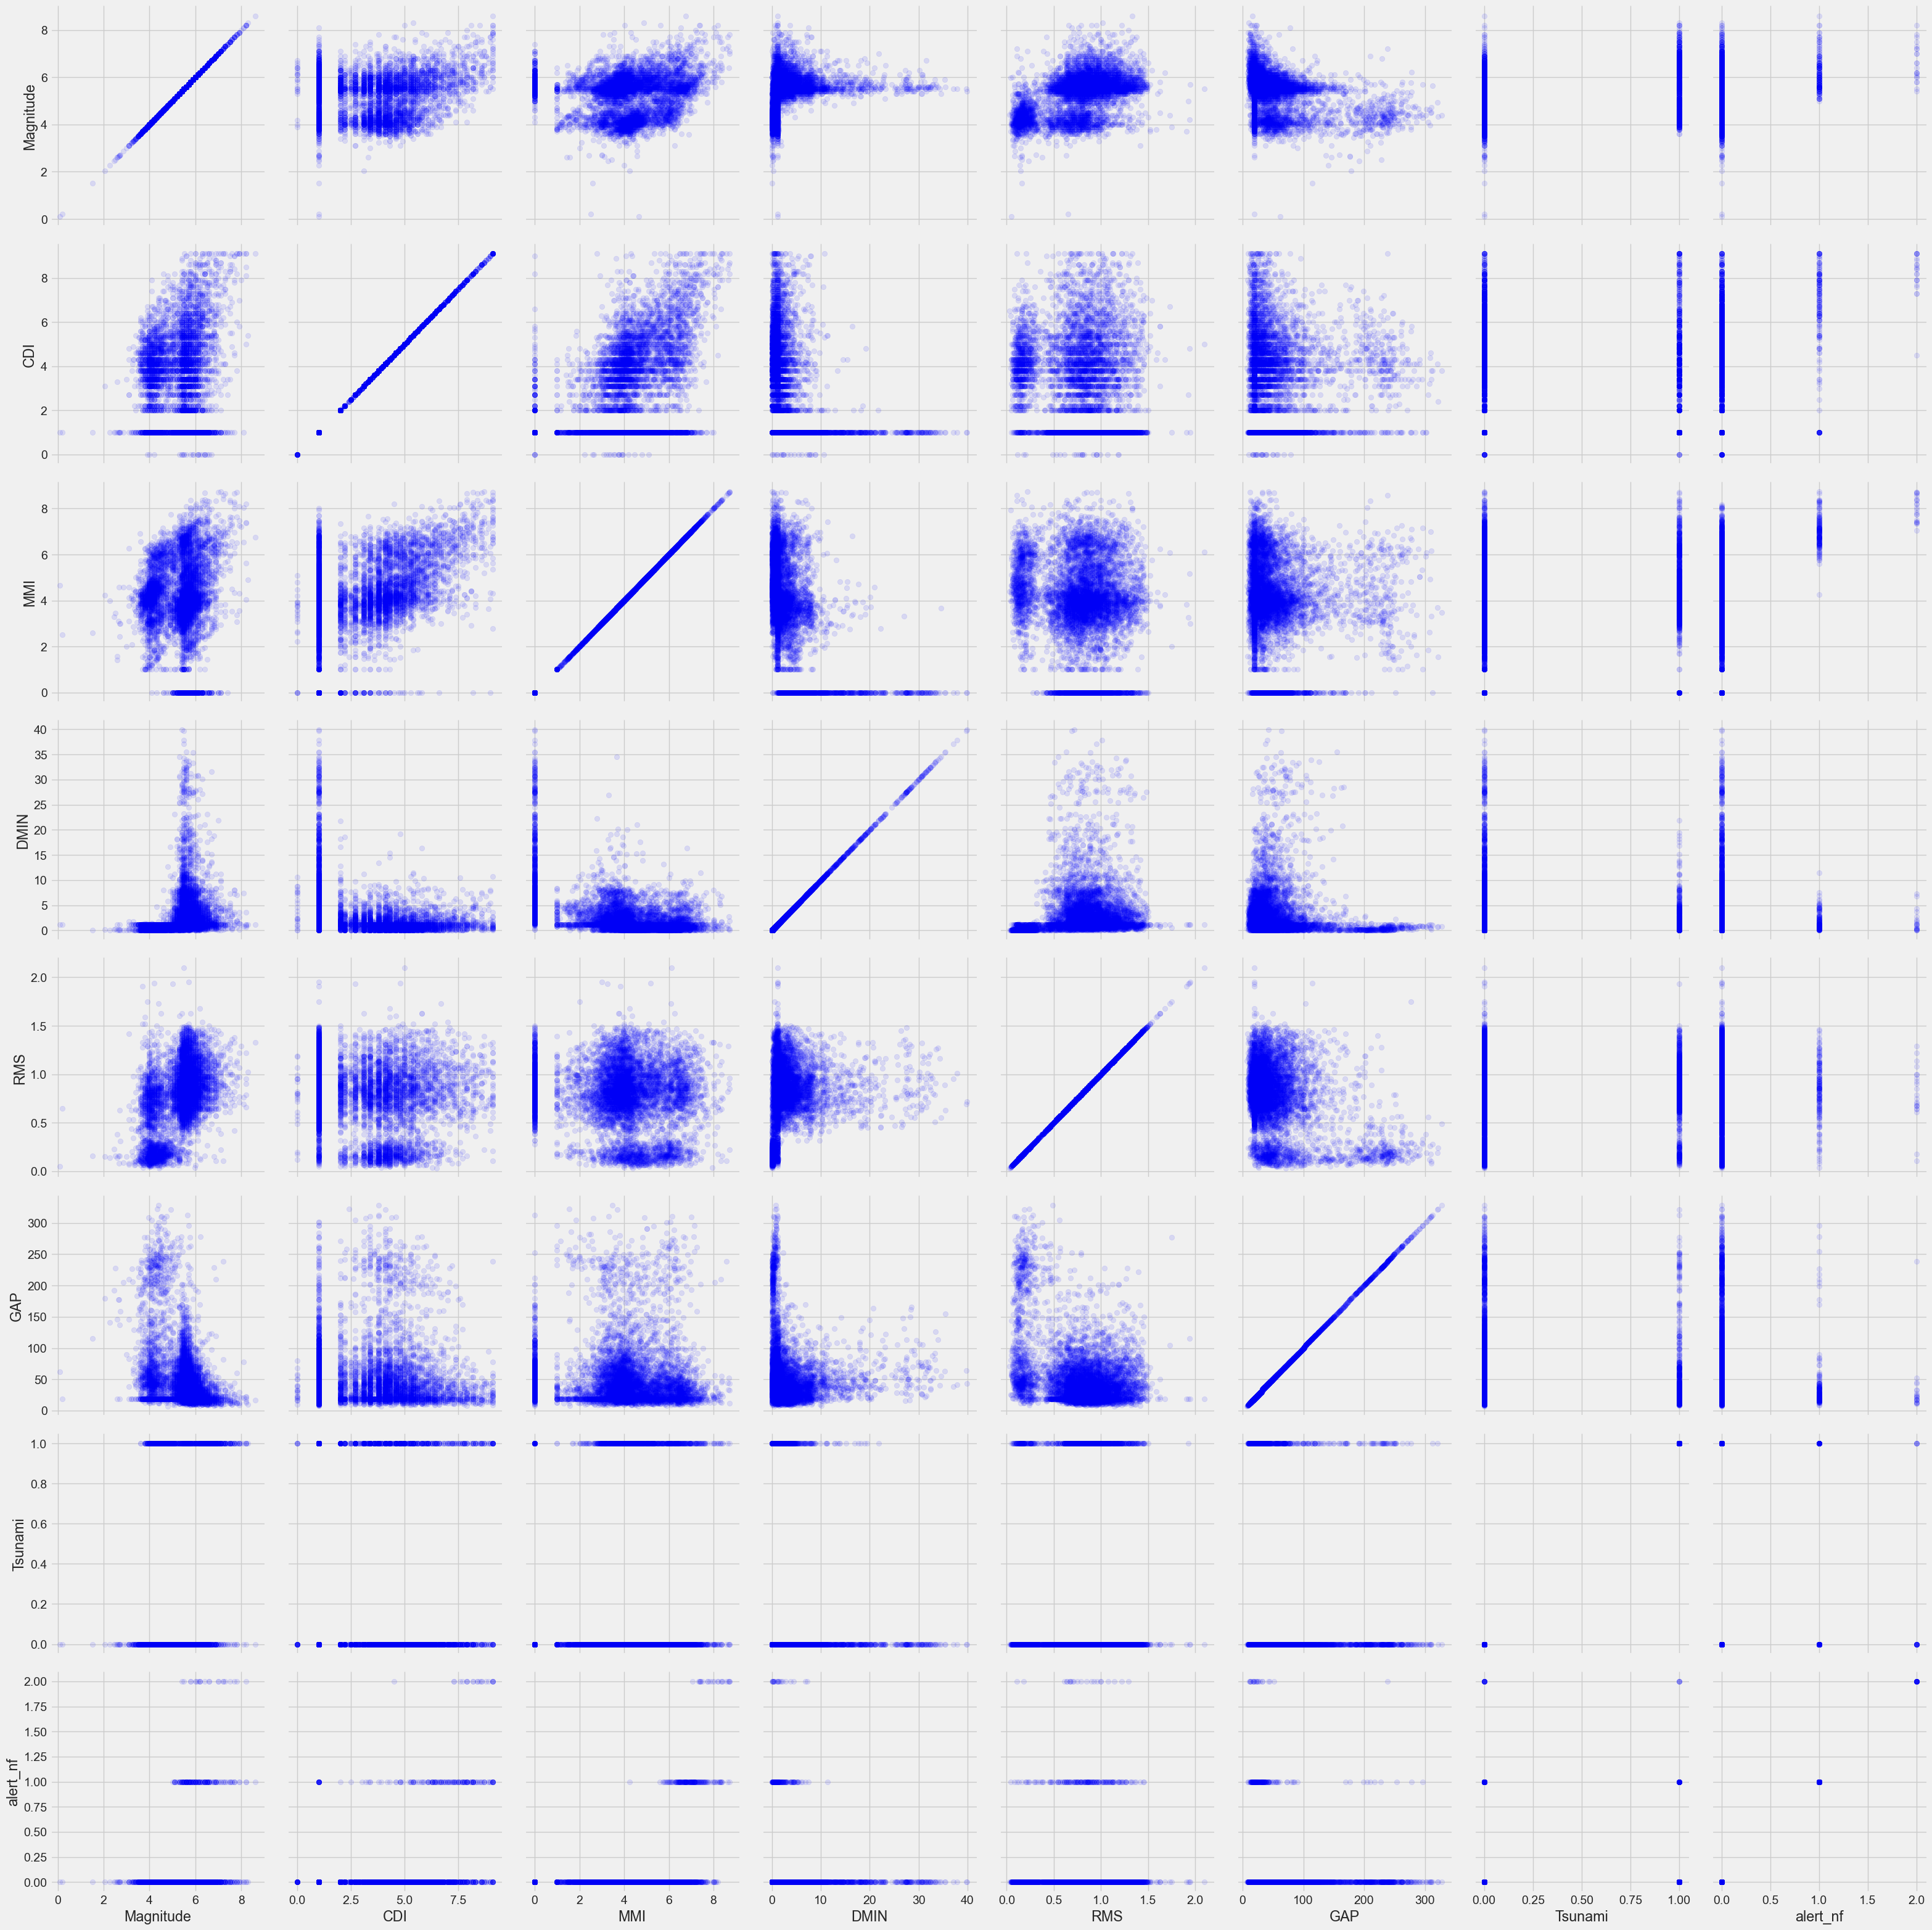

In [435]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
g = sns.PairGrid(df_final,height=4)
g = g.map(plt.scatter,color='b', linestyle='solid', alpha=0.1)
xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    plt.setp(ax.get_xticklabels(), visible=True)
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    plt.setp(ax.get_yticklabels(), visible=True)
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])
        
plt.show()

g.savefig("Scatter_Plot2.png",dpi=100)

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [436]:
df_final.head(2)

df_final_1 = df_final.loc[~df_final.index.duplicated(), :]
df_final_1

Magnitude  CDI    MMI    DMIN   RMS    GAP  Tsunami  alert_nf  \
0          6.40  8.6  8.689  2.7720  0.90   52.0        0         2   
1          5.40  7.3  7.413  3.7490  0.67   19.0        0         2   
2          7.00  7.7  7.735  0.0700  0.64   43.0        1         2   
3          7.20  9.1  8.425  1.1780  0.75   23.0        1         2   
4          6.00  8.5  7.049  1.3240  0.79   11.0        0         2   
...         ...  ...    ...     ...   ...    ...      ...       ...   
6959       4.50  1.0  5.780  0.6140  0.55  246.0        0         0   
6960       4.24  1.0  5.360  1.1580  0.24   61.0        0         0   
6961       4.10  1.0  4.080  0.3099  0.45  160.0        0         0   
89         6.50  8.7  7.606  4.1390  0.65   30.0        1         1   
95         6.90  9.1  6.662  0.3560  0.73   39.0        1         1   

                          DT  
0    2021-11-14 12:08:38.812  
1    2021-09-15 20:33:31.851  
2    2021-09-08 01:47:47.437  
3    2021-08-14 12:29:08.454  
4    2021-04-28 02:21:26.212  
...                      ...  
6959 2000-04-25 14:06:26.070  
6960 2000-03-28 15:16:15.810  
6961 2000-01-30 19:10:23.470  
89   2017-07-06 08:03:57.550  
95   2017-04-24 21:38:30.820  

[6940 rows x 9 columns]

In [437]:
#df_final_1.index.is_unique
df_final_1.index.duplicated()

array([False, False, False, ..., False, False, False])

##-Pair Plot

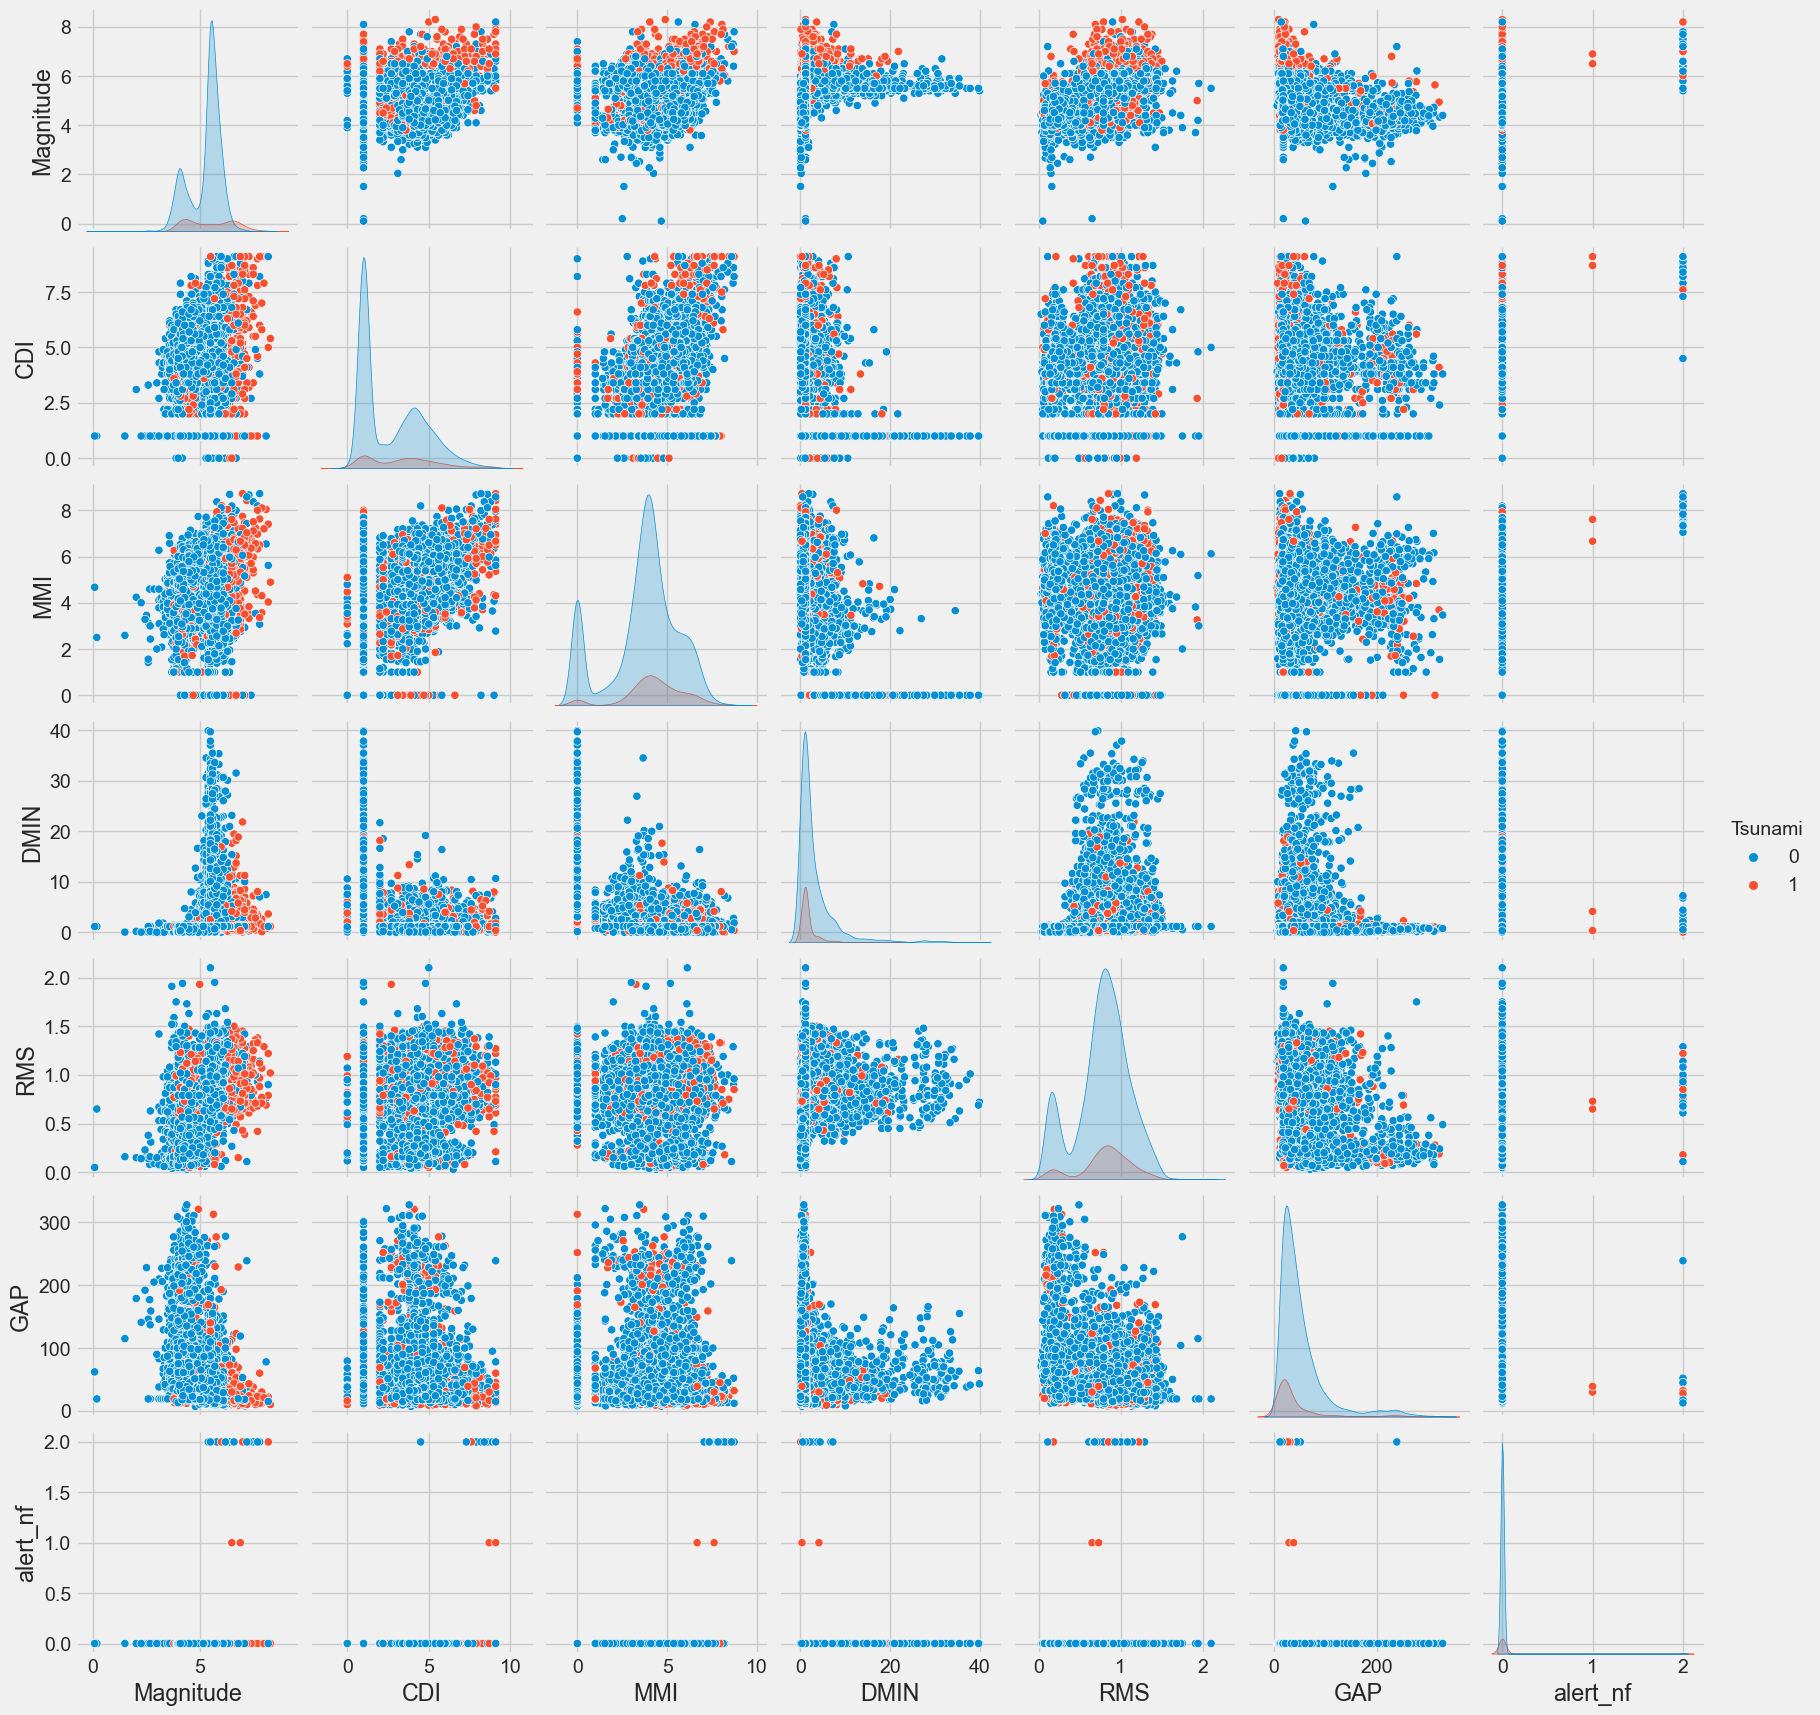

In [438]:
##---------Pair Plot------------------##
# importing packages
import seaborn
import matplotlib.pyplot as plt
  
############# Main Section ############
# loading dataset using seaborn
#dfs = seaborn.load_dataset('df_final')
# pairplot with hue sex
seaborn.pairplot(df_final_1, hue ='Tsunami')
# to show
plt.show()


In [306]:
#df_final=df_final.drop(['Country'], axis='columns')
#df_final.head(2)

Magnitude  CDI    MMI   DMIN   RMS   GAP  Tsunami  alert_nf  \
0        6.4  8.6  8.689  2.772  0.90  52.0        0         2   
1        5.4  7.3  7.413  3.749  0.67  19.0        0         2   

                       DT  
0 2021-11-14 12:08:38.812  
1 2021-09-15 20:33:31.851

Magnitude
CDI
MMI
DMIN
RMS
GAP
alert_nf
DT


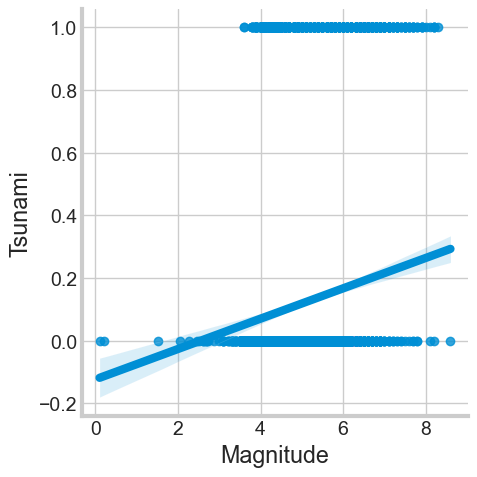

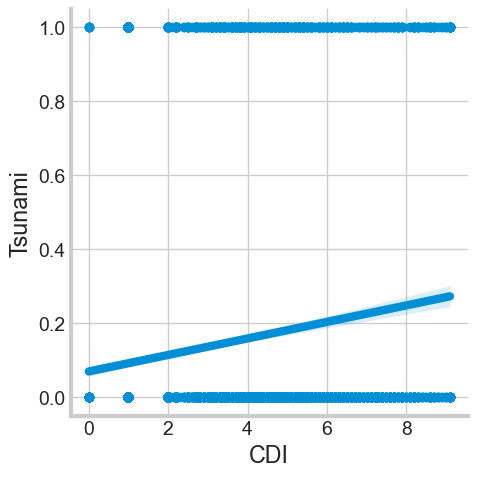

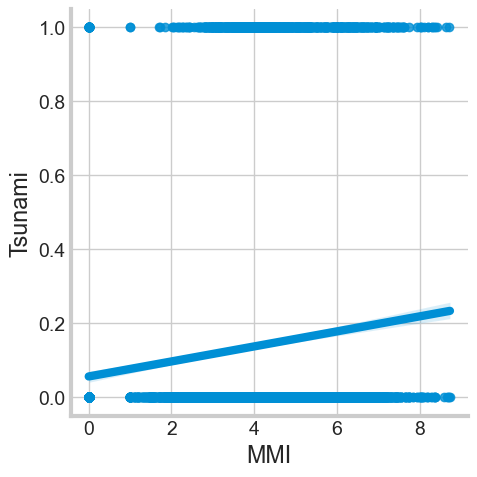

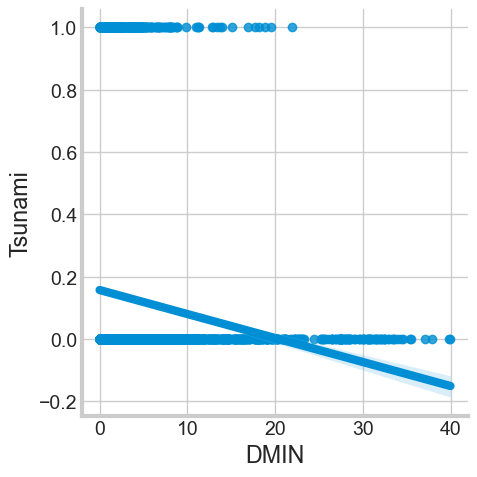

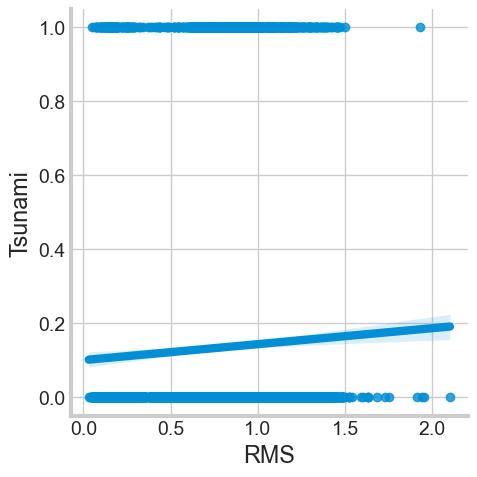

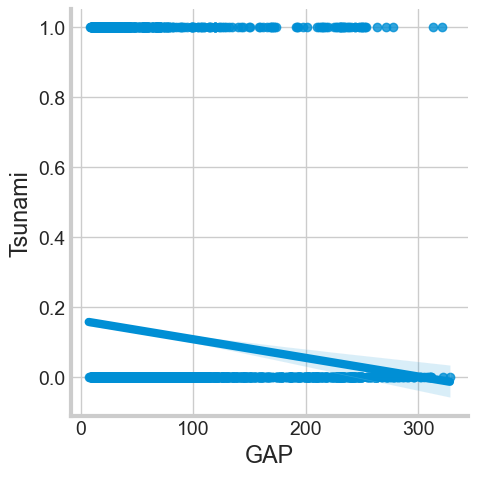

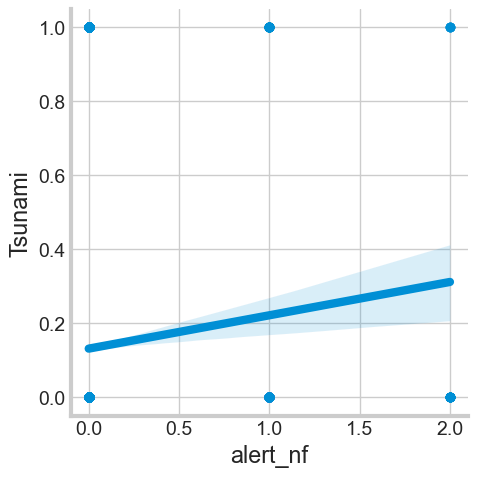

In [439]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
for i in list(X.columns):
    print(i)
    if i not in {'DT'}:
        sns.lmplot(x = i , y ='Tsunami', data=df_final)
plt.show()

# 5. Data Wrangling



## 5.1 Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

In [440]:
print(X.columns)

Index(['Magnitude', 'CDI', 'MMI', 'DMIN', 'RMS', 'GAP', 'alert_nf', 'DT'], dtype='object')


In [441]:
##---------Type the code below this line------------------##
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))


for i in list(X.columns):
    print(i)
    if i not in {'DT'}:
        arr=np.array((df_final[i]).astype(float))
            
        print("gini index for ", i, " = ", gini(arr))

Magnitude
gini index for  Magnitude  =  0.08390678135460747
CDI
gini index for  CDI  =  0.3875123474742117
MMI
gini index for  MMI  =  0.2765508963326221
DMIN
gini index for  DMIN  =  0.603245172288231
RMS
gini index for  RMS  =  0.23088158768219347
GAP
gini index for  GAP  =  0.42510974559635933
alert_nf
gini index for  alert_nf  =  0.9751179457523754
DT


In [351]:
#We do not have any categorical features in the dataframe so only gini index can be used

## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

In [301]:
#We do not have any categorical features in the dataframe so we have used only gini index


# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms
1. Classification -- Decision Tree classifier 

2. Clustering -- kmeans

3. Association Analysis

4. Anomaly detection

5. Textual data -- Naive Bayes classifier (not taught in this course)

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

## 6.1 ML technique 1 + Justification

In [442]:
##---------Type the code below this line------------------##


df_final['alert_nf'] = df_final['alert_nf'].astype(float) 
df_final=df_final.drop(['DT'], axis='columns')
df_final.columns


Index(['Magnitude', 'CDI', 'MMI', 'DMIN', 'RMS', 'GAP', 'Tsunami', 'alert_nf'], dtype='object')

In [443]:
from sklearn.model_selection import train_test_split
y = df_final['Tsunami'].values
X = df_final.drop(columns = ['Tsunami'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [444]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [445]:
y_predict = clf_model.predict(X_test)

In [446]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.891588785046729

In [447]:
target = list(df['Tsunami'].unique())
feature_names = list(X.columns)

In [448]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- Magnitude <= 6.35
|   |--- GAP <= 19.15
|   |   |--- GAP <= 18.90
|   |   |   |--- class: 0
|   |   |--- GAP >  18.90
|   |   |   |--- class: 0
|   |--- GAP >  19.15
|   |   |--- DMIN <= 1.15
|   |   |   |--- class: 0
|   |   |--- DMIN >  1.15
|   |   |   |--- class: 0
|--- Magnitude >  6.35
|   |--- MMI <= 3.25
|   |   |--- DMIN <= 10.91
|   |   |   |--- class: 0
|   |   |--- DMIN >  10.91
|   |   |   |--- class: 1
|   |--- MMI >  3.25
|   |   |--- MMI <= 7.64
|   |   |   |--- class: 1
|   |   |--- MMI >  7.64
|   |   |   |--- class: 0



## 6.2 ML technique 2 + Justification

In [453]:
##---------Type the code below this line------------------##
y = df_final['Tsunami'].values
X = df_final.drop(columns = ['Tsunami'])

In [454]:
df_final.head(2)

Magnitude  CDI    MMI   DMIN   RMS   GAP  Tsunami  alert_nf
0        6.4  8.6  8.689  2.772  0.90  52.0        0       2.0
1        5.4  7.3  7.413  3.749  0.67  19.0        0       2.0

In [367]:
y = df_final['Tsunami'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [512]:
#!pip install mlxtend
#import mlxtend
import warnings
warnings.filterwarnings('ignore')
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.linear_model import LogisticRegression
  
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=4)
y = df_final.Tsunami
X = df_final.drop('Tsunami', axis=1)
sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.9s finished

[2023-01-30 18:43:50] Features: 1/3 -- score: 0.8819571007991027[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.5s finished

[2023-01-30 18:43:51] Features: 2/3 -- score: 0.9045282489835974[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished

[2023-01-30 18:43:53] Features: 3/3 -- score: 0.9066311509883639

In [513]:
sfs1.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.8819571]),
  'avg_score': 0.8819571007991027,
  'feature_names': ('Magnitude',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.90452825]),
  'avg_score': 0.9045282489835974,
  'feature_names': ('Magnitude', 'MMI')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.90663115]),
  'avg_score': 0.9066311509883639,
  'feature_names': ('Magnitude', 'CDI', 'MMI')}}

In [514]:
#feature_names = ( 'alert_nf', 'Magnitude', 'CDI', 'MMI', 'DMIN', 'RMS', 'GAP')
XX=X.iloc[:, [6,0,1,2,3,4,5]]
sfs1 = sfs1.fit(XX, y)
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.9s finished

[2023-01-30 18:44:04] Features: 1/3 -- score: 0.8819571007991027[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.2s finished

[2023-01-30 18:44:06] Features: 2/3 -- score: 0.9045282489835974[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished

[2023-01-30 18:44:07] Features: 3/3 -- score: 0.9066311509883639

{1: {'feature_idx': (1,),
  'cv_scores': array([0.8819571]),
  'avg_score': 0.8819571007991027,
  'feature_names': ('Magnitude',)},
 2: {'feature_idx': (1, 3),
  'cv_scores': array([0.90452825]),
  'avg_score': 0.9045282489835974,
  'feature_names': ('Magnitude', 'MMI')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.90663115]),
  'avg_score': 0.9066311509883639,
  'feature_names': ('Magnitude', 'CDI', 'MMI')}}

In [515]:
sfs1.k_feature_idx_

(1, 2, 3)

In [516]:
sfs1.k_feature_names_

('Magnitude', 'CDI', 'MMI')

In [517]:
sfs1.k_score_

0.9066311509883639

## 7. Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

In [390]:
##---------Type the code below this line------------------##
#From Decesion Tree.


(0, 1, 2)

In [518]:
#From Associative Analysis. The top three features are
# Magnitude
# CDI
# MMI

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!